# Running tensorflow on Trade data

## Reading data from database

<AxesSubplot:xlabel='DateTimeEn'>

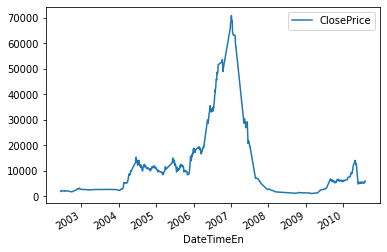

In [4]:
import codes.handlers as hd

rides = hd.ReadPanda('trade-graph', (19857, 0, 1000,))
rides.plot(x='DateTimeEn', y='ClosePrice')

In [ ]:
import codes.trade as trade

trade.read_trade(300, 10, 150000, verbose=0)

## Creating the model

In [ ]:
import tensorflow.keras as keras

model = keras.models.Sequential(name='logits')
model.add(keras.Input(shape=x_training.shape[1:]))

model.add(keras.layers.Conv2D(3, (1, 5), strides=(1, 1), activation='gelu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(6, (1, 5), strides=(1, 1), activation='gelu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(9, (1, 5), strides=(1, 1), activation='gelu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(60, activation="gelu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(y_training.shape[1:], activation="sigmoid"))

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

model.summary()

## Running tensorflow

In [ ]:
from keras.callbacks import ModelCheckpoint

check_point_path = 'mnist.mlp.gelu.b2.model.best.hdf5'

# train the model
checkpointer = ModelCheckpoint(filepath=check_point_path, 
                               verbose=1, save_best_only=True)

x_training = np.load('trade-all-x.npy')
y_training = np.load('trade-all-y.npy')

In [ ]:
hist = model.fit(x_training, y_training, batch_size=512, epochs=3,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=0, shuffle=True)